**ICP-Data Integration and Visulaization Summary**
1) Importing libraries

2) Reading Covid Data sets

3) Data filtering

4) Data Integration using merge(), join() and concatenate

5) Data visualization using matplot lib, pandas and seaborn (pie chart, line chart, heatmaps etc).



In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns


In [163]:
df = pd.read_csv('https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_cumulative.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_national.csv')

In [164]:
print(df.shape)
print(df1.shape)

(11592, 18)
(1288, 19)


In [165]:
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines,people_vaccinated,people_fully_vaccinated,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id
0,2020-01-25,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
1,2020-01-26,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
2,2020-01-27,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
3,2020-01-28,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
4,2020-01-29,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,2023-08-04,1725730,2954,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,5115451,2,Australia,Queensland,NaN,36068882
11588,2023-08-04,932940,1548,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1756494,2,Australia,South Australia,NaN,165128d0
11589,2023-08-04,302852,277,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,535500,2,Australia,Tasmania,NaN,86525f8e
11590,2023-08-04,2978839,7454,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,6629870,2,Australia,Victoria,NaN,6c5dccdb


In [166]:
df1

,date,confirmed,confirmed_cum,deaths,deaths_cum,tests,tests_cum,positives,positives_cum,recovered,recovered_cum,hosp,hosp_cum,icu,icu_cum,vent,vent_cum,vaccines,vaccines_cum
0,2020-01-25,4,4,0,0,NaN,0.0,4,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
1,2020-01-26,0,4,0,0,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
2,2020-01-27,1,5,0,0,NaN,0.0,1,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
3,2020-01-28,0,5,0,0,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
4,2020-01-29,4,9,0,0,NaN,0.0,4,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2023-07-31,0,11731441,0,19999,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
1284,2023-08-01,0,11731441,0,19999,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
1285,2023-08-02,0,11731441,0,19999,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
1286,2023-08-03,0,11731441,0,19999,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0


Lets remove all the non-cumulative columns from the df 1 data frame

In [167]:
df_filtered=df1.drop(['confirmed','deaths','tests','positives','recovered','hosp', 'icu','vent'], axis=1)
df_filtered

,date,confirmed_cum,deaths_cum,tests_cum,positives_cum,recovered_cum,hosp_cum,icu_cum,vent_cum,vaccines,vaccines_cum
0,2020-01-25,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2020-01-26,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2020-01-27,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2020-01-28,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,2020-01-29,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1283,2023-07-31,11731441,19999,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1284,2023-08-01,11731441,19999,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1285,2023-08-02,11731441,19999,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1286,2023-08-03,11731441,19999,0.0,0.0,0.0,0.0,0.0,0.0,0,0


** Data Integration**

Pandas merge(): Combining Data on Common Columns or Indices.
The first technique you’ll learn is merge(). You can use merge() any time you want to do database-like join operations. It’s the most flexible joining operation (the other are join() and concat()).

How to merge()

Before getting into the details of how to use merge(), you should first understand the various forms of joins:

>inner

>outer

>left

>right

Outer Join

Here, you’ll specify an outer join with the how parameter. Remember from the diagrams below that in an outer join (also known as a full outer join), all rows from both DataFrames will be present in the new DataFrame.

If a row doesn’t have a match in the other DataFrame (based on the key column[s]), then you won’t lose the row like you would with an inner join. Instead, the row will be in the merged DataFrame with NaN values filled in where appropriate.


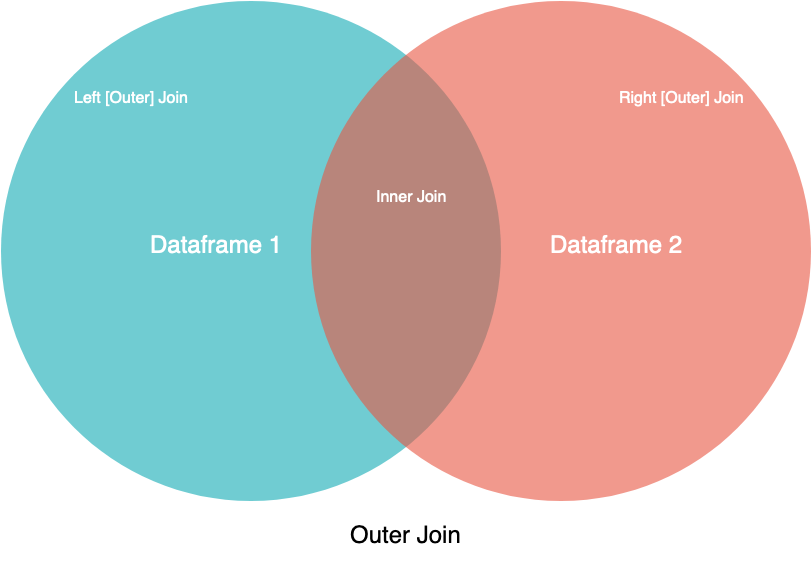




In [168]:
outer_merged = pd.merge(df, df_filtered, how="outer", on=["date"])
outer_merged.head()


,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines_x,...,confirmed_cum,deaths_cum,tests_cum,positives_cum,recovered_cum,hosp_cum,icu_cum,vent_cum,vaccines_y,vaccines_cum
0,2020-01-25,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2020-01-25,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [169]:
outer_merged.shape

(11592, 28)

Concatenating objects:

The concat() function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. Note that I say “if any” because there is only a single possible axis of concatenation for Series.

Before diving into all of the details of concat and what it can do, here is a simple example:

source : [link text](https://pandas.pydata.org/docs/user_guide/merging.html)

In [170]:
df1_a = pd.DataFrame(
       { "A": ["A0", "A1", "A2", "A3"],
            "B": ["B0", "B1", "B2", "B3"],
            "C": ["C0", "C1", "C2", "C3"],
            "D": ["D0", "D1", "D2", "D3"],
        },
        index=[0, 1, 2, 3],
 )

df2_a = pd.DataFrame(
    {
           "A": ["A4", "A5", "A6", "A7"],
            "B": ["B4", "B5", "B6", "B7"],
            "C": ["C4", "C5", "C6", "C7"],
            "D": ["D4", "D5", "D6", "D7"],
       },
        index=[4, 5, 6, 7],
    )


df3_a = pd.DataFrame(
       {
            "A": ["A8", "A9", "A10", "A11"],
            "B": ["B8", "B9", "B10", "B11"],
            "C": ["C8", "C9", "C10", "C11"],
            "D": ["D8", "D9", "D10", "D11"],
       },
        index=[8, 9, 10, 11],
    )


frames = [df1_a, df2_a, df3_a]
# row wise concat
result = pd.concat(frames)

In [171]:
df1_a

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [172]:
df2_a

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [173]:
df3_a

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


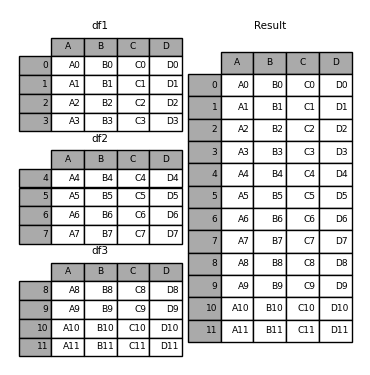

In [174]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [175]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")
s2 = pd.Series(["_0", "_1", "_2", "_3"])
#column wise concat
result = pd.concat([df1_a, s1, s2], axis=1)

In [176]:
s1

,X
0,X0
1,X1
2,X2
3,X3


In [177]:
s2

,0
0,_0
1,_1
2,_2
3,_3


In [178]:
result

,A,B,C,D,X,0
0,A0,B0,C0,D0,X0,_0
1,A1,B1,C1,D1,X1,_1
2,A2,B2,C2,D2,X2,_2
3,A3,B3,C3,D3,X3,_3


**Data Visulaization**

We’ll be using data from  Github repository that auto-updates the data daily. We’ll load our data into a Pandas’ dataframe based on the URL so that it’ll update automatically for us every day.

In [179]:
df_global = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df_global

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


we read in the data into a dataframe df_global, and then select only the countries in our list countries. Selecting the data makes the resulting visualization a little more readable.

we create a summary column that aggregates the total number of cases across our confirmed cases, recovered cases, and any individuals who have died as a result of COVID-19.

In [180]:
countries = ['Brazil', 'Germany', 'United Kingdom', 'US', 'Italy', 'China']
df_regional = df_global[df_global['Country'].isin(countries)]

# Creating a Summary Column
df_regional['Cases'] = df_regional[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

<ipython-input-180-6b9eee60b56f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
df_regional

,Date,Country,Confirmed,Recovered,Deaths,Cases
19584,2020-01-22,Brazil,0,0,0,0
19585,2020-01-23,Brazil,0,0,0,0
19586,2020-01-24,Brazil,0,0,0,0
19587,2020-01-25,Brazil,0,0,0,0
19588,2020-01-26,Brazil,0,0,0,0
...,...,...,...,...,...,...
153403,2022-04-12,United Kingdom,21846115,0,171004,22017119
153404,2022-04-13,United Kingdom,21883579,0,171662,22055241
153405,2022-04-14,United Kingdom,21916961,0,172014,22088975
153406,2022-04-15,United Kingdom,21916961,0,172014,22088975


Now that we have our data stored within a dataframe, let’s prepare another dataframe that will hold our data in crosstabs, which will allow us to more easily visualize the data.
we pivot our dataframe df_regional, creating columns out of countries, with the number of cases as the data fields. This new dataframe is called covid. We then set the index of the dataframe to be the date and assign the country names to column headers.

In [182]:
#  Restructuring our Data
df_regional = df_regional.pivot(index='Date', columns='Country', values='Cases')
countries = list(df_regional.columns)
print(countries)
df_regional

['Brazil', 'China', 'Germany', 'Italy', 'US', 'United Kingdom']


Country,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0
...,...,...,...,...,...,...
2022-04-12,30846027,1669001,23149457,15565841,81464184,22017119
2022-04-13,30872838,1695023,23315135,15628582,81506332,22055241
2022-04-14,30896067,1718871,23472211,15694348,81561653,22088975


In [183]:
covid = df_regional.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
covid

,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0
...,...,...,...,...,...,...
2022-04-12,30846027,1669001,23149457,15565841,81464184,22017119
2022-04-13,30872838,1695023,23315135,15628582,81506332,22055241
2022-04-14,30896067,1718871,23472211,15694348,81561653,22088975


In [184]:
covid.shape[1]

6

Interactive Graph 1: Bar

In [206]:
import plotly.express as px

# Prepare data: Reset index and melt to long format for Plotly
covid_latest = covid.iloc[-1].reset_index().rename(columns={'index': 'Country', covid.index[-1]: 'Cases'})

# Interactive Bar Plot
fig_bar = px.bar(
    covid_long[covid_long['Days'] == covid_long['Days'].max()],
    x='Country',
    y='Cases',
    color='Country',
    title=f'COVID-19 Cases by Country on {covid_long["Days"].max()}',
    labels={'Cases': 'Number of COVID-19 Cases (x10⁷)', 'Country': 'Country'}
)

fig_bar.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of COVID-19 Cases (x10⁷)',
    legend_title='Countries',
    hovermode='closest'
)

fig_bar.show()


Interactive Graph2 : bar

In [204]:
import pandas as pd
import plotly.express as px

# Load state-wise data for the US from a reliable online source
df_states = pd.read_csv(
    'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv',
    parse_dates=['date']
)

# Select latest available date
latest_date = df_states['date'].max()
latest_states = df_states[df_states['date'] == latest_date]

# Create interactive bar plot
fig_states = px.bar(
    latest_states,
    x='state',
    y='cases',
    color='state',
    title=f'State-wise COVID-19 Cases in the US on {latest_date.date()}',
    labels={'state': 'US State', 'cases': 'Total COVID-19 Cases'}
)

# Enhance interactivity and readability
fig_states = fig_states.update_layout(
    legend_title='States',
    xaxis_tickangle=-45,
    hovermode='closest'
)

fig_states.show()
